In [2]:
# https://deeplearningcourses.com/c/deep-learning-convolutional-neural-networks-theano-tensorflow
# https://udemy.com/deep-learning-convolutional-neural-networks-theano-tensorflow
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

%matplotlib inline
import numpy as np
# from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

In [3]:
# def convolve2d(X, W):
#     t0 = datetime.now()
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in xrange(n1 + m1 - 1):
#         for ii in xrange(m1):
#             for j in xrange(n2 + m2 - 1):
#                 for jj in xrange(m2):
#                     if i >= ii and j >= jj and i - ii < n1 and j - jj < n2:
#                         Y[i,j] += W[ii,jj]*X[i - ii,j - jj]
#     print "elapsed time:", (datetime.now() - t0)
#     return Y

In [4]:
# def convolve2d(X, W):
#     t0 = datetime.now()
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in xrange(n1):
#         for j in xrange(n2):
#             Y[i:i+m1,j:j+m2] += X[i,j]*W
#     print "elapsed time:", (datetime.now() - t0)
#     return Y

In [5]:
# same size as input
def convolve2d(X, W):
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    ret = Y[m1//2:-m1//2+1,m2//2:-m2//2+1]
    assert(ret.shape == X.shape)
    return ret

In [6]:
# smaller than input
# def convolve2d(X, W):
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in xrange(n1):
#         for j in xrange(n2):
#             Y[i:i+m1,j:j+m2] += X[i,j]*W
#     ret = Y[m1-1:-m1+1,m2-1:-m2+1]
#     return ret

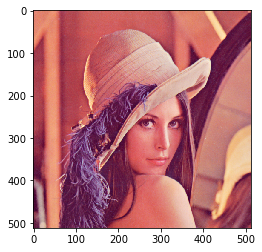

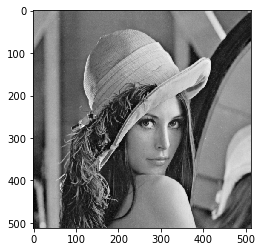

In [7]:
# load the famous Lena image
img = mpimg.imread('cnn_data/lena.png')

# what does it look like?
plt.imshow(img)
plt.show()

# make it B&W
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')
plt.show()

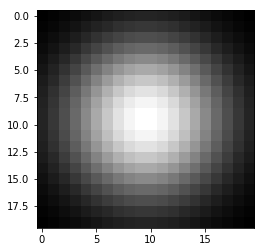

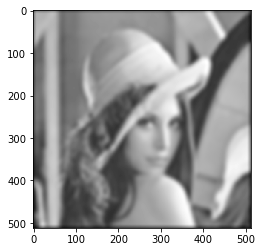

In [8]:
# create a Gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

# let's see what the filter looks like
plt.imshow(W, cmap='gray')
plt.show()

# now the convolution
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

In [9]:
# what's that weird black stuff on the edges? let's check the size of output
print(out.shape)
# after convolution, the output signal is N1 + N2 - 1

(512, 512)
